In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

2024-05-02 14:55:23.979392: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 14:55:25.290878: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 14:55:28.580260: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 14:55:33.077009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base = pd.read_csv('/workspaces/neurosity-sdk-python/Datas/psd_base.csv')
grab = pd.read_csv('/workspaces/neurosity-sdk-python/Datas/psd_grab.csv')

In [3]:
base.head()

D1          D2          D3         D4         D5         D6  \
0    0.482034    1.919870    2.691165   1.061252   1.730667   2.623123   
1  191.375246  236.735303  178.771278  26.885019  64.567567  19.626319   
2    4.578852   17.409200   46.241583  33.159809   8.843061  16.998231   
3    0.418375    1.863908    3.344391   5.312909   3.273720   2.765471   
4    0.969075    5.123753    8.240180   4.839501   1.997715   3.047654   

          D7         D8         D9       D10  ...       D55       D56  \
0   1.131930   1.495544   1.337321  0.307635  ...  0.107254  0.111767   
1  48.692455  25.520086  16.811263  9.728792  ...  3.455962  1.218104   
2   5.667883  14.632042   0.556767  8.878563  ...  0.184356  1.752642   
3   2.168866   1.938744   3.435933  0.647570  ...  0.241353  0.172902   
4   1.047532   3.422774   1.830089  1.253057  ...  0.072744  0.260563   

        D57       D58       D59       D60       D61       D62       D63  \
0  0.106066  0.110766  0.105224  0.110002  0.104597  0.109496  0.104227   
1  3.418723  1.206275  3.390303  1.197527  3.370370  1.191662  3.358341   
2  0.182402  1.735874  0.180965  1.723306  0.180053  1.715133  0.179357   
3  0.238708  0.171171  0.236802  0.169957  0.235426  0.169136  0.234614   
4  0.071920  0.257967  0.071332  0.256029  0.070881  0.254758  0.070618   

        D64  
0  0.109247  
1  1.188806  
2  1.711010  
3  0.168728  
4  0.254129  

[5 rows x 64 columns]

In [4]:
grab.head()

D1          D2          D3         D4         D5         D6  \
0   0.248035    0.602275    1.199516   1.715311   1.648510   0.931883   
1  17.071647  234.311012  225.771586  65.994971  65.591052  30.336730   
2  11.756010    5.982776   28.049364  29.467653  10.284307   9.399984   
3   3.275146    8.428928    7.781682   1.604088   3.796590   2.548108   
4   2.526166    4.092923    3.983242   2.285853   1.149263   0.335391   

          D7         D8         D9        D10  ...       D55       D56  \
0   0.342584   1.139753   1.269002   0.417861  ...  0.063953  0.027564   
1  41.991554  18.330857  32.476177  18.841216  ...  6.153556  2.916291   
2   7.111479   0.387055   2.230384   2.086861  ...  0.372441  0.451571   
3   1.769446   2.260117   1.325136   0.517884  ...  0.144976  0.110571   
4   0.518206   1.781071   1.353676   0.989196  ...  0.061863  0.076358   

        D57       D58       D59       D60       D61       D62       D63  \
0  0.062998  0.027302  0.062228  0.027085  0.061700  0.026948  0.061389   
1  6.085553  2.887796  6.033795  2.866645  5.997282  2.852589  5.975453   
2  0.368224  0.447802  0.365141  0.444904  0.362974  0.443071  0.361602   
3  0.142811  0.109589  0.141297  0.108761  0.140194  0.108224  0.139547   
4  0.060872  0.075595  0.060121  0.075011  0.059580  0.074636  0.059263   

        D64  
0  0.026880  
1  2.845676  
2  0.442097  
3  0.107957  
4  0.074452  

[5 rows x 64 columns]

In [5]:
base.describe()

D1           D2           D3           D4           D5  \
count  2152.000000  2152.000000  2152.000000  2152.000000  2152.000000   
mean      6.310807     9.803550    10.409743     7.520861     6.213793   
std       8.724729    11.123882    10.980502     7.996961     7.198017   
min       0.002180     0.100211     0.331179     0.064135     0.081962   
25%       1.363016     2.832611     3.231797     2.501378     2.197366   
50%       3.175440     5.621002     6.223742     4.635200     3.808373   
75%       8.331942    13.926267    14.295409     9.646453     7.082279   
max     191.375246   236.735303   178.771278    80.492323    66.399987   

                D6           D7           D8           D9          D10  ...  \
count  2152.000000  2152.000000  2152.000000  2152.000000  2152.000000  ...   
mean      4.963614     3.825981     3.103250     2.655758     2.386872  ...   
std       5.045055     3.454916     3.157662     2.476326     2.161547  ...   
min       0.061438     0.015187     0.061742     0.019409     0.053304  ...   
25%       1.985396     1.736471     1.248852     1.108625     1.025038  ...   
50%       3.520813     2.876717     2.167142     1.962346     1.766109  ...   
75%       5.918532     4.752503     3.697691     3.279912     2.938282  ...   
max      37.094432    48.692455    25.907518    22.410863    18.931505  ...   

               D55          D56          D57          D58          D59  \
count  2152.000000  2152.000000  2152.000000  2152.000000  2152.000000   
mean      0.222178     0.226093     0.219567     0.223745     0.217570   
std       0.263765     0.273655     0.260896     0.270988     0.258699   
min       0.001139     0.000602     0.001001     0.000404     0.000863   
25%       0.060881     0.054910     0.060160     0.054310     0.059524   
50%       0.132102     0.130752     0.130261     0.129434     0.129023   
75%       0.284652     0.283971     0.281318     0.281082     0.278465   
max       3.455962     2.242910     3.418723     2.220070     3.390303   

               D60          D61          D62          D63          D64  
count  2152.000000  2152.000000  2152.000000  2152.000000  2152.000000  
mean      0.222008     0.216156     0.220855     0.215308     0.220280  
std       0.269021     0.257156     0.267726     0.256242     0.267087  
min       0.000293     0.000764     0.000181     0.000476     0.000109  
25%       0.053932     0.059121     0.053701     0.058899     0.053587  
50%       0.128331     0.128080     0.127691     0.127594     0.127345  
75%       0.278854     0.276535     0.277496     0.275565     0.276743  
max       2.203146     3.370370     2.191977     3.358341     2.186430  

[8 rows x 64 columns]

In [6]:
grab.describe()

D1           D2           D3           D4           D5  \
count  2376.000000  2376.000000  2376.000000  2376.000000  2376.000000   
mean     10.430269    18.144332    19.856695    13.325412     8.850896   
std      19.374944    30.123808    34.950473    26.701498    16.427493   
min       0.003550     0.093300     0.141388     0.040924     0.020230   
25%       1.442474     2.989962     3.347901     2.306878     1.761832   
50%       3.338048     5.733081     6.263647     4.476447     3.302153   
75%       9.949104    17.372775    18.416080    11.859110     8.030977   
max     203.620997   251.156391   321.608539   355.108149   287.801974   

                D6           D7           D8           D9          D10  ...  \
count  2376.000000  2376.000000  2376.000000  2376.000000  2376.000000  ...   
mean      6.115179     4.733147     3.796414     3.252093     2.900901  ...   
std      10.124561     7.994516     5.498707     4.697011     3.971065  ...   
min       0.050707     0.050832     0.070917     0.045063     0.052823  ...   
25%       1.619608     1.415644     1.164697     1.022953     0.943874  ...   
50%       2.921517     2.549288     2.045880     1.778227     1.684139  ...   
75%       5.935451     4.727925     3.959810     3.369968     3.091683  ...   
max     174.356546   183.005428    75.094336    95.929406    49.578123  ...   

               D55          D56          D57          D58          D59  \
count  2376.000000  2376.000000  2376.000000  2376.000000  2376.000000   
mean      0.391690     0.384069     0.387227     0.380164     0.383811   
std       0.757190     0.736255     0.748861     0.729064     0.742498   
min       0.001266     0.000298     0.001114     0.000262     0.000692   
25%       0.052752     0.050991     0.052013     0.050108     0.051358   
50%       0.128254     0.119826     0.126819     0.118684     0.125580   
75%       0.339535     0.344966     0.335515     0.341164     0.332555   
max      10.955958     8.141374    10.834435     8.062343    10.741666   

               D60          D61          D62          D63          D64  
count  2376.000000  2376.000000  2376.000000  2376.000000  2376.000000  
mean      0.377283     0.381396     0.375378     0.379954     0.374431  
std       0.723749     0.738010     0.720240     0.735342     0.718501  
min       0.000176     0.000383     0.000110     0.000215     0.000055  
25%       0.049799     0.050951     0.049387     0.050728     0.049295  
50%       0.117733     0.124779     0.117149     0.124055     0.116835  
75%       0.338259     0.330334     0.336215     0.329094     0.335266  
max       8.003771    10.676163     7.965221    10.637227     7.945958  

[8 rows x 64 columns]

In [7]:
# add values to the "target" column. The number should be 0
base['target'] = 0
grab['target'] = 1

array([[<Axes: title={'center': 'D1'}>, <Axes: title={'center': ' D2'}>,
        <Axes: title={'center': ' D3'}>, <Axes: title={'center': ' D4'}>,
        <Axes: title={'center': ' D5'}>, <Axes: title={'center': ' D6'}>,
        <Axes: title={'center': ' D7'}>, <Axes: title={'center': ' D8'}>],
       [<Axes: title={'center': ' D9'}>,
        <Axes: title={'center': ' D10'}>,
        <Axes: title={'center': ' D11'}>,
        <Axes: title={'center': ' D12'}>,
        <Axes: title={'center': ' D13'}>,
        <Axes: title={'center': ' D14'}>,
        <Axes: title={'center': ' D15'}>,
        <Axes: title={'center': ' D16'}>],
       [<Axes: title={'center': ' D17'}>,
        <Axes: title={'center': ' D18'}>,
        <Axes: title={'center': ' D19'}>,
        <Axes: title={'center': ' D20'}>,
        <Axes: title={'center': ' D21'}>,
        <Axes: title={'center': ' D22'}>,
        <Axes: title={'center': ' D23'}>,
        <Axes: title={'center': ' D24'}>],
       [<Axes: title={'center':

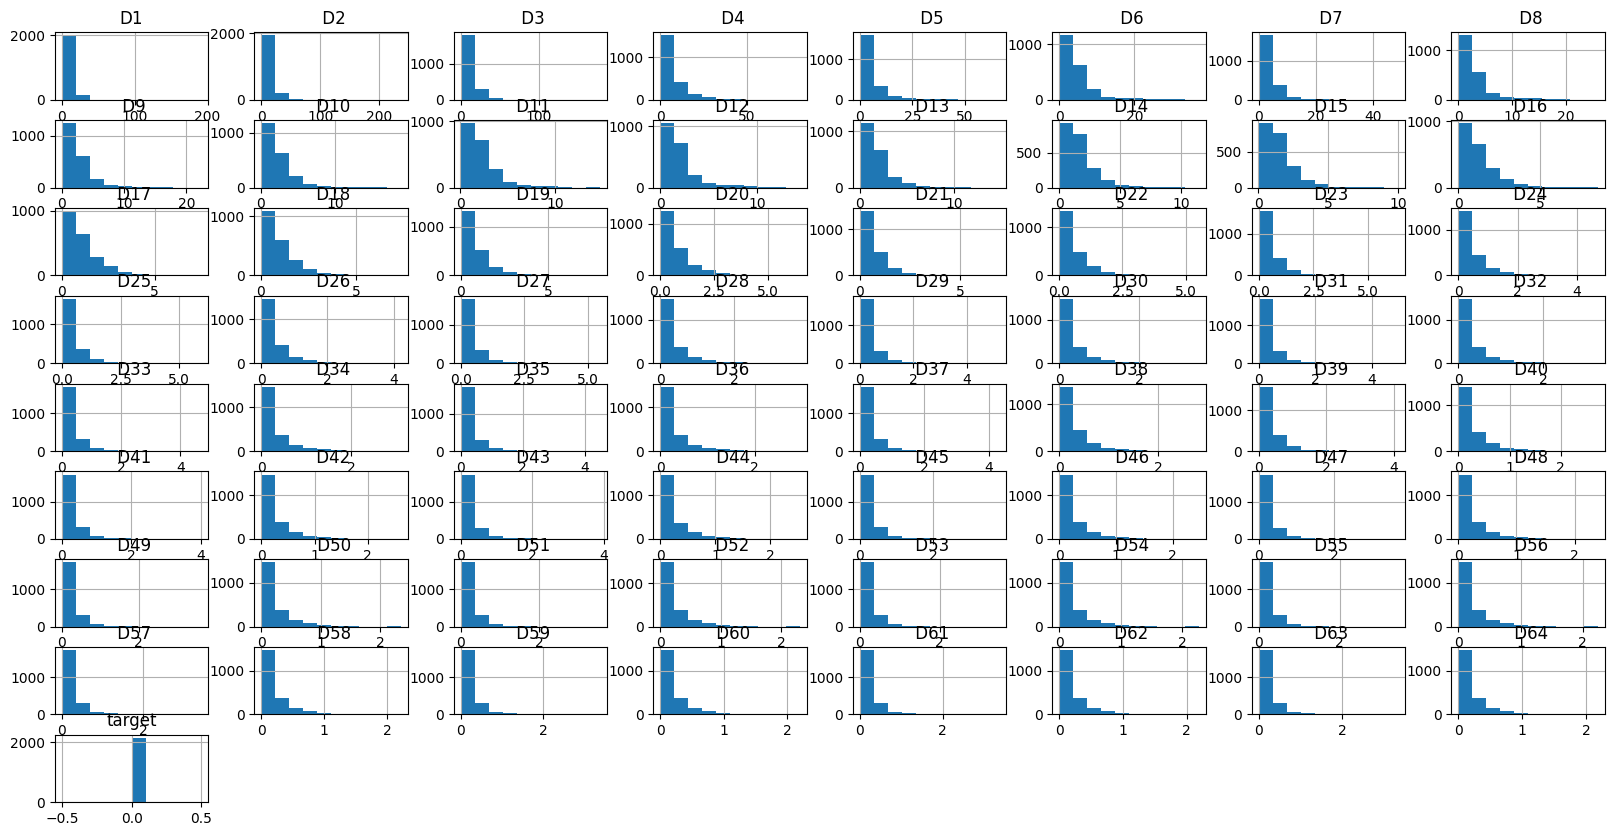

In [8]:
# plot a histogram of the data
# make the size bigger
plt.rcParams['figure.figsize'] = [20, 10]
base.hist()

array([[<Axes: title={'center': 'D1'}>, <Axes: title={'center': ' D2'}>,
        <Axes: title={'center': ' D3'}>, <Axes: title={'center': ' D4'}>,
        <Axes: title={'center': ' D5'}>, <Axes: title={'center': ' D6'}>,
        <Axes: title={'center': ' D7'}>, <Axes: title={'center': ' D8'}>],
       [<Axes: title={'center': ' D9'}>,
        <Axes: title={'center': ' D10'}>,
        <Axes: title={'center': ' D11'}>,
        <Axes: title={'center': ' D12'}>,
        <Axes: title={'center': ' D13'}>,
        <Axes: title={'center': ' D14'}>,
        <Axes: title={'center': ' D15'}>,
        <Axes: title={'center': ' D16'}>],
       [<Axes: title={'center': ' D17'}>,
        <Axes: title={'center': ' D18'}>,
        <Axes: title={'center': ' D19'}>,
        <Axes: title={'center': ' D20'}>,
        <Axes: title={'center': ' D21'}>,
        <Axes: title={'center': ' D22'}>,
        <Axes: title={'center': ' D23'}>,
        <Axes: title={'center': ' D24'}>],
       [<Axes: title={'center':

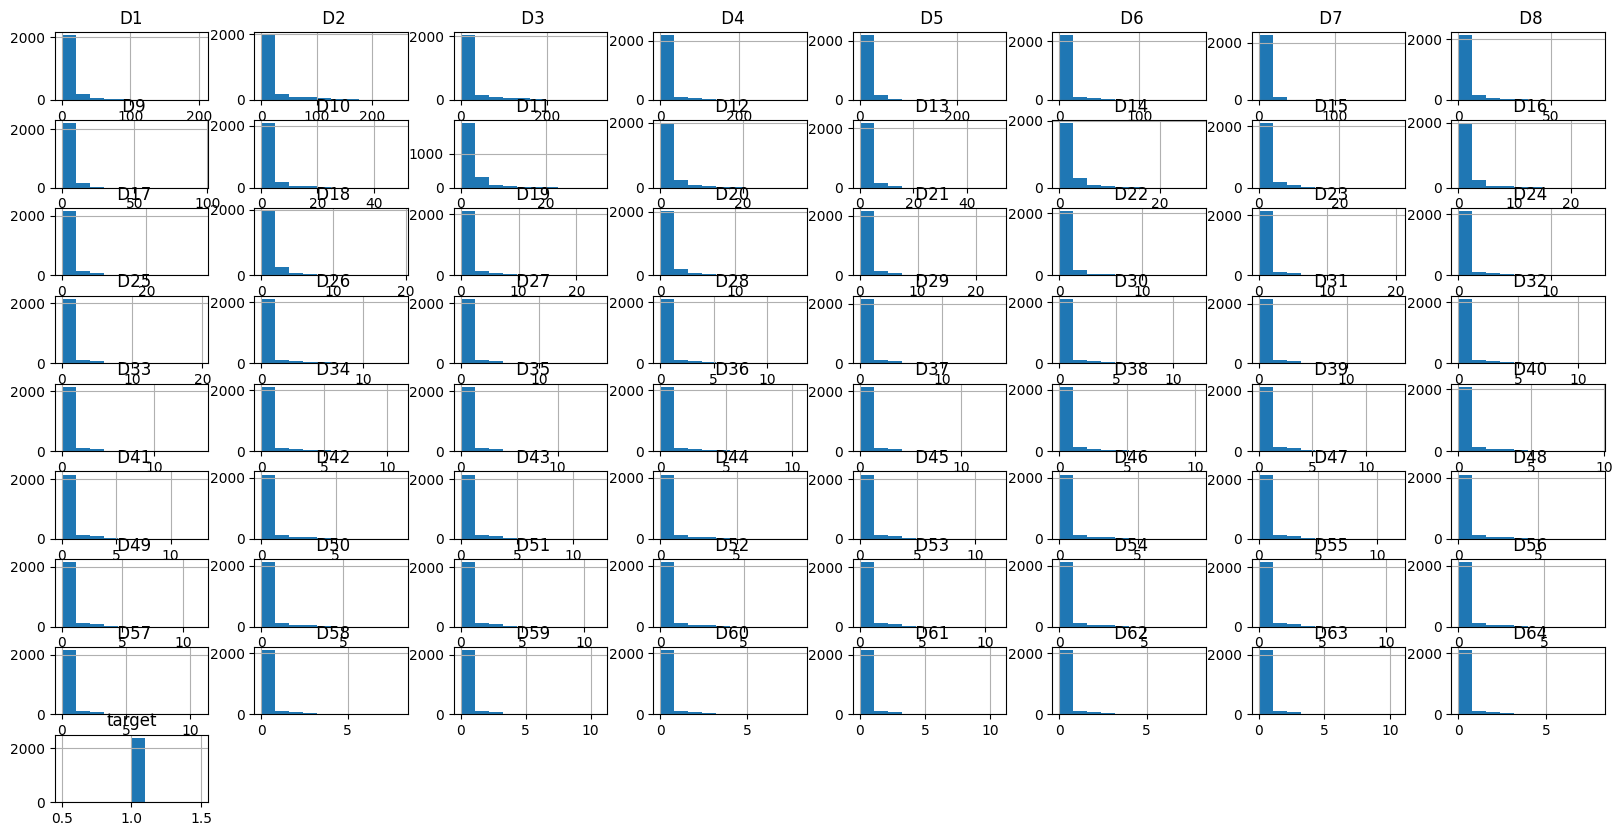

In [9]:
# plot a histogram of the data
# make the size bigger
plt.rcParams['figure.figsize'] = [20, 10]
grab.hist()

<Axes: >

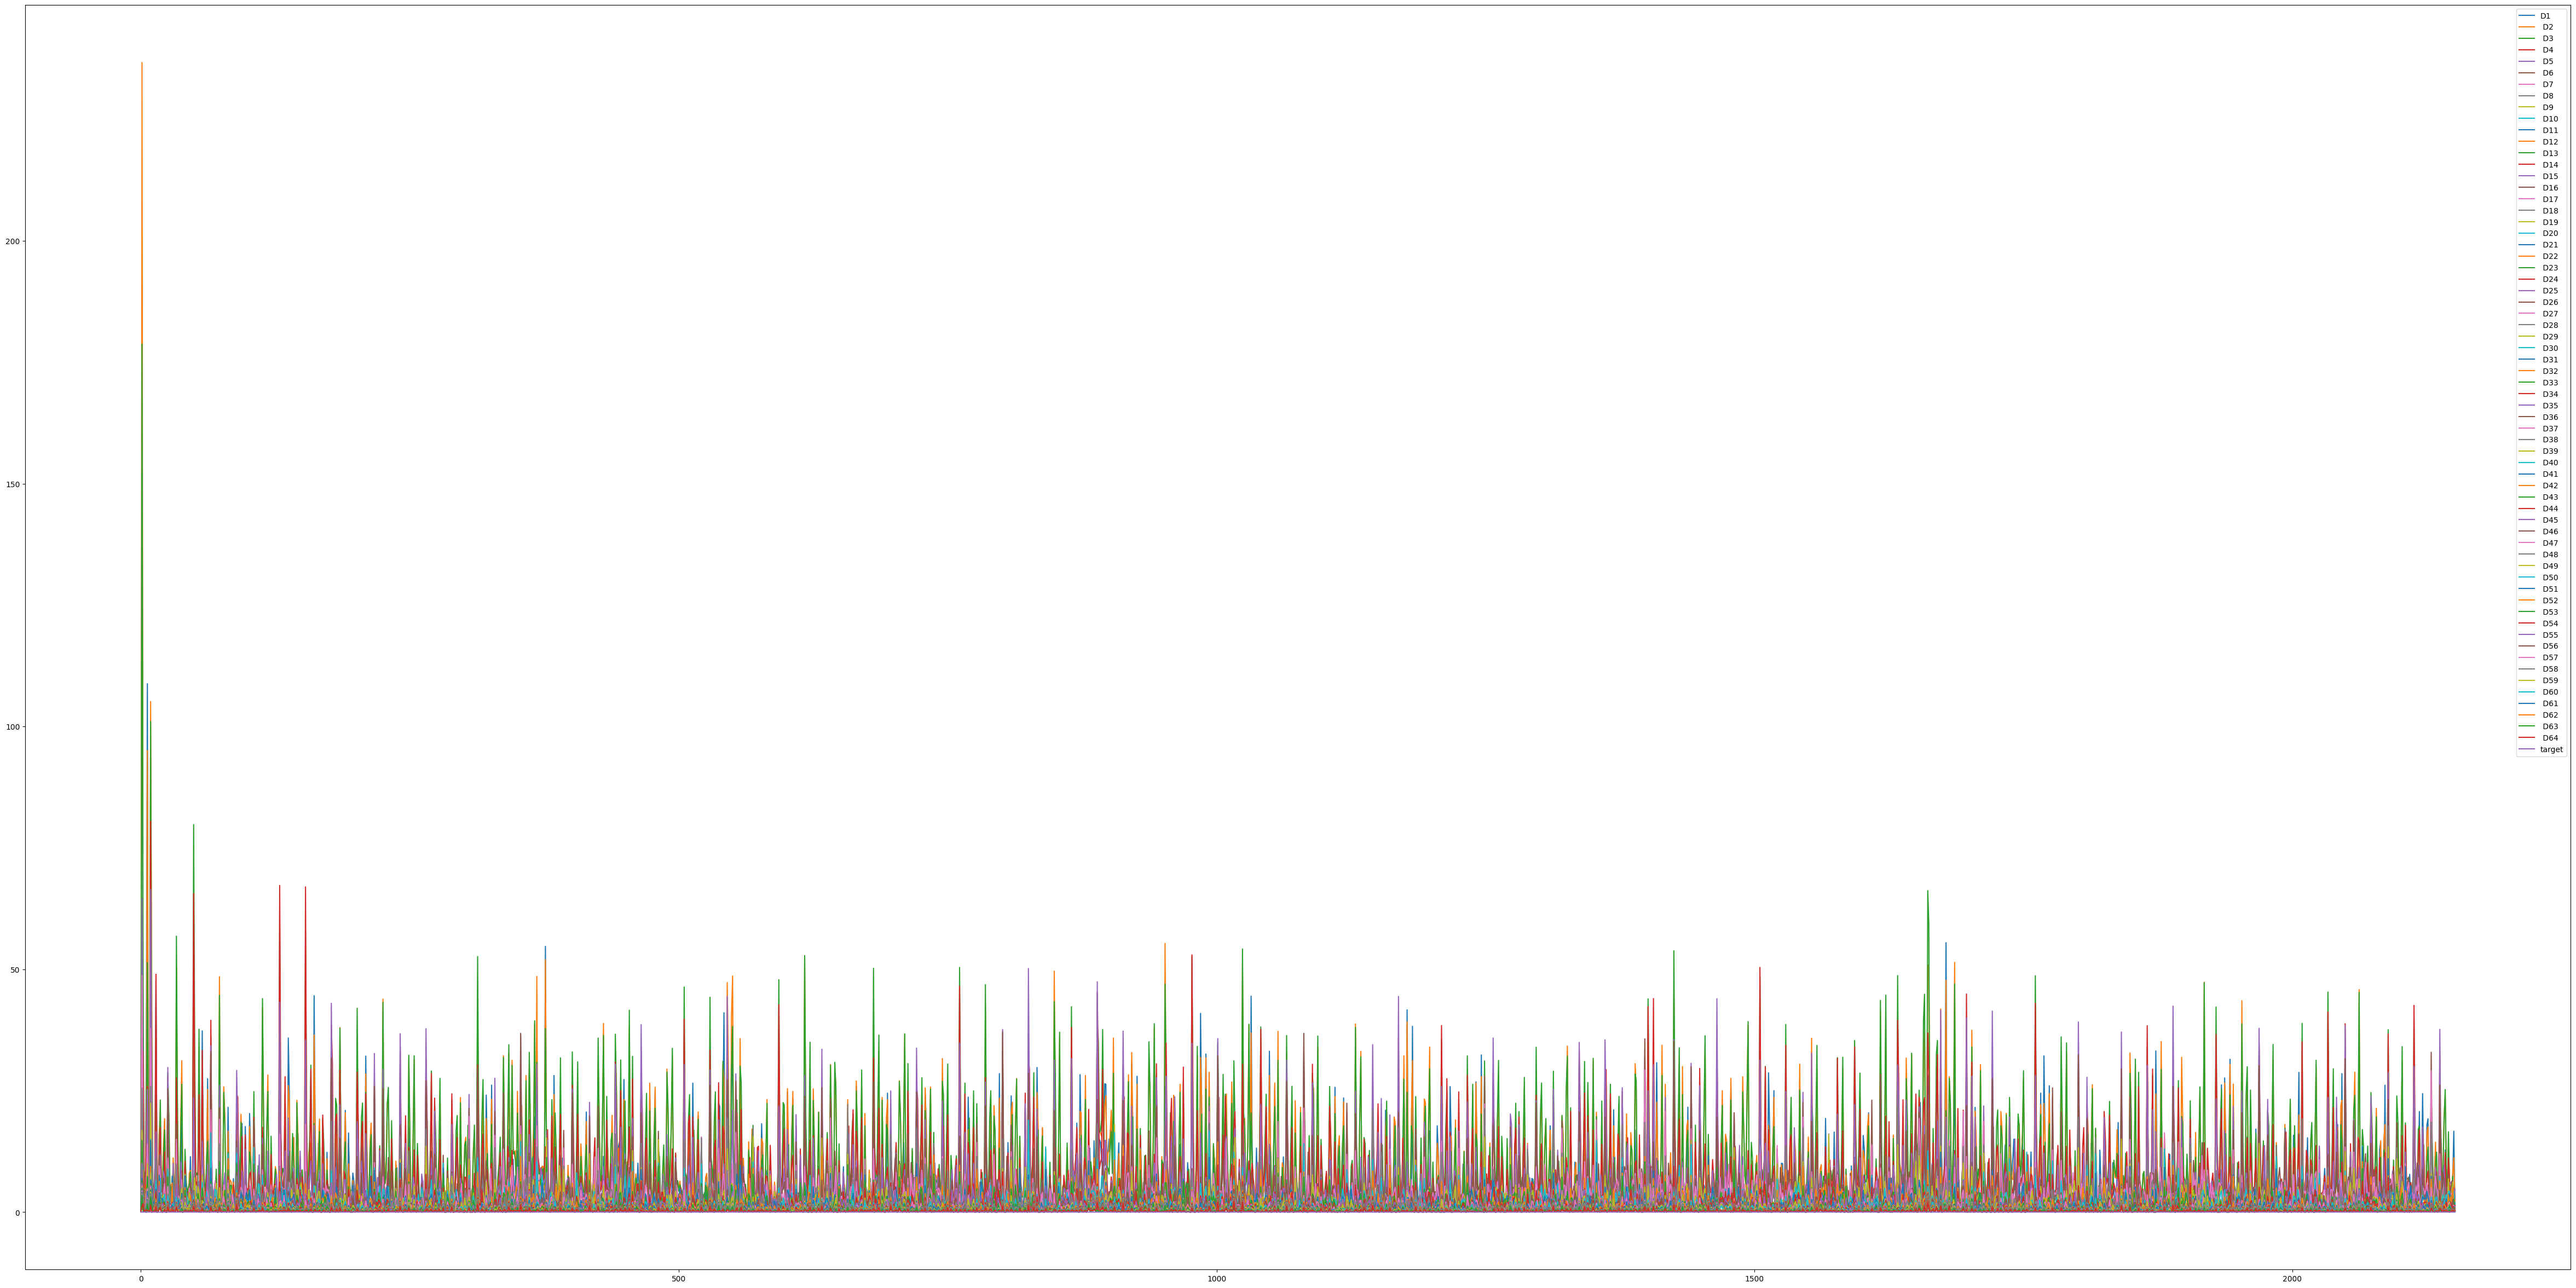

In [10]:
#graph the data
plt.rcParams['figure.figsize'] = [60, 30]
base.plot()

<Axes: >

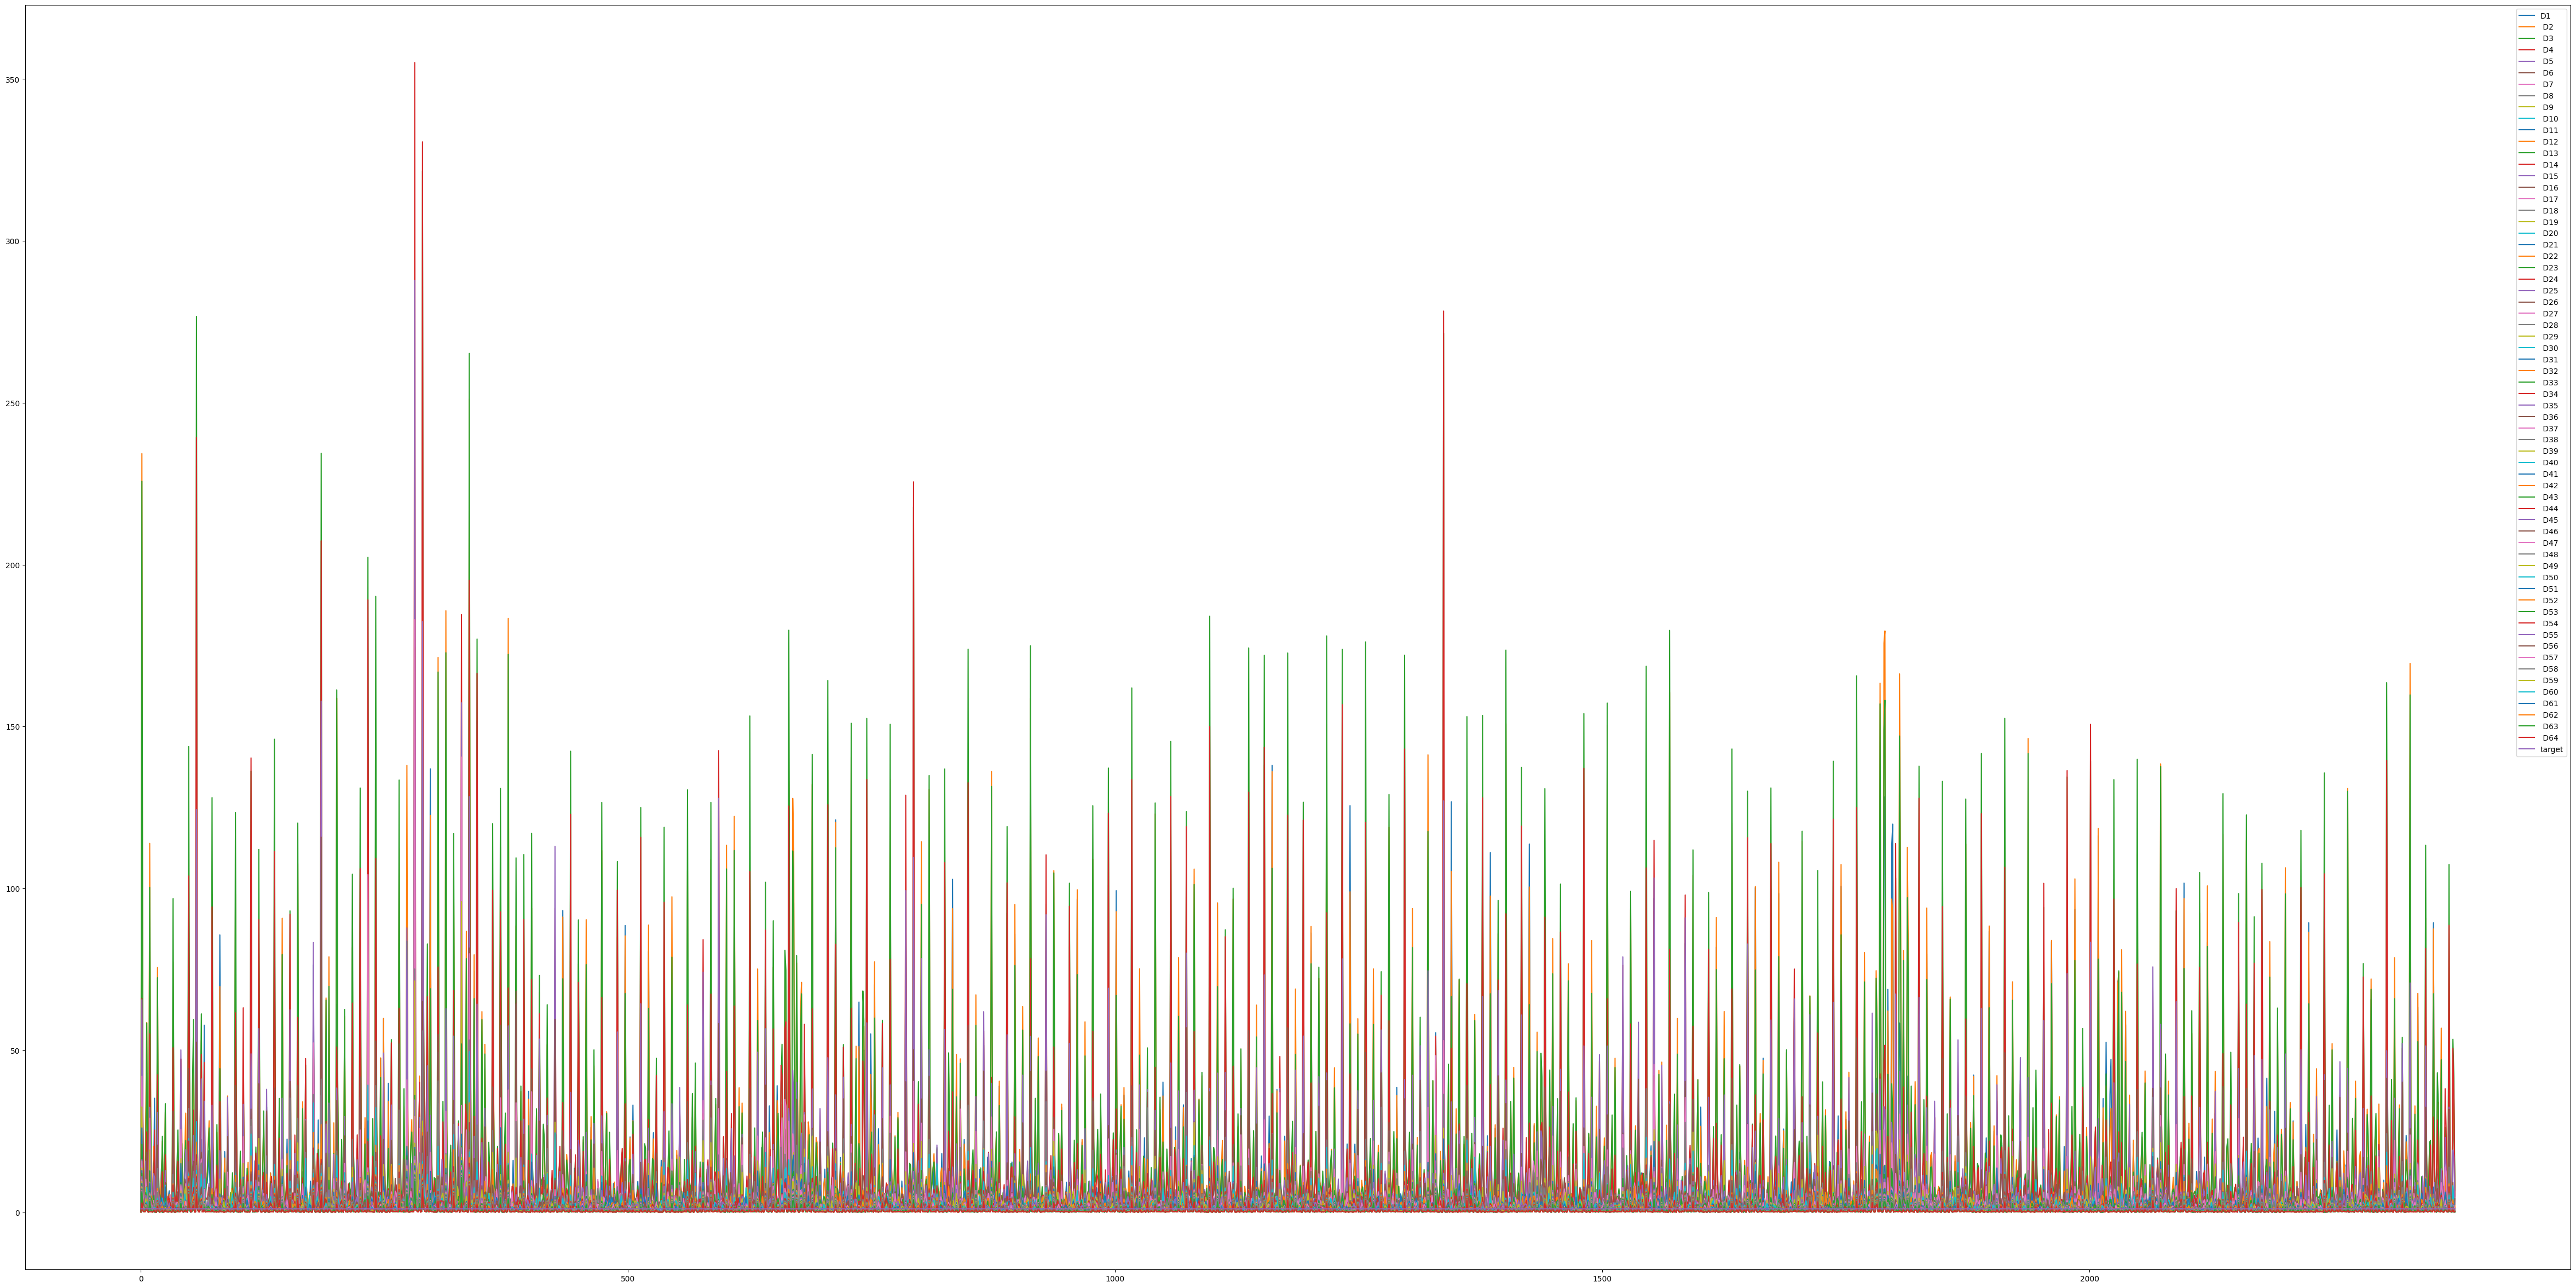

In [11]:
#graph the data
plt.rcParams['figure.figsize'] = [60, 30]
grab.plot()

In [12]:
#count the number of columns with bigger than 10000
(grab > 100).sum()
#(data < -1000).sum()

D1         23
 D2        92
 D3       124
 D4        58
 D5        11
         ... 
 D61        0
 D62        0
 D63        0
 D64        0
target      0
Length: 65, dtype: int64

In [13]:
# Merge the data
data = pd.concat([base, grab], axis=0)
#shuffle the data
data = data.sample(frac=1)
data.describe()

D1           D2           D3           D4           D5  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000   
mean      8.472433    14.180250    15.366889    10.566712     7.597573   
std      15.405903    23.499382    26.840364    20.318374    12.958813   
min       0.002180     0.093300     0.141388     0.040924     0.020230   
25%       1.399696     2.905374     3.285515     2.392493     1.958046   
50%       3.253131     5.670529     6.234385     4.556224     3.536193   
75%       9.218818    15.218570    16.123836    10.794261     7.465556   
max     203.620997   251.156391   321.608539   355.108149   287.801974   

                D6           D7           D8           D9          D10  ...  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000  ...   
mean      5.567881     4.302003     3.466977     2.968676     2.656601  ...   
std       8.136502     6.277514     4.551931     3.817952     3.249464  ...   
min       0.050707     0.015187     0.061742     0.019409     0.052823  ...   
25%       1.768007     1.556438     1.207825     1.069599     0.981987  ...   
50%       3.232155     2.738381     2.111210     1.864160     1.727479  ...   
75%       5.932876     4.741065     3.833489     3.320360     3.019919  ...   
max     174.356546   183.005428    75.094336    95.929406    49.578123  ...   

               D56          D57          D58          D59          D60  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000   
mean      0.308989     0.307544     0.305823     0.304803     0.303486   
std       0.571135     0.577548     0.565557     0.572646     0.561435   
min       0.000298     0.001001     0.000262     0.000692     0.000176   
25%       0.053422     0.056166     0.052571     0.055609     0.052107   
50%       0.124952     0.128436     0.123618     0.127113     0.122658   
75%       0.309333     0.305454     0.306224     0.302747     0.303905   
max       8.141374    10.834435     8.062343    10.741666     8.003771   

               D61          D62          D63          D64       target  
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000  
mean      0.302863     0.301939     0.301704     0.301168     0.524735  
std       0.569189     0.558716     0.567135     0.557368     0.499443  
min       0.000383     0.000110     0.000215     0.000055     0.000000  
25%       0.055218     0.051913     0.055022     0.051745     0.000000  
50%       0.126216     0.122093     0.125615     0.121807     1.000000  
75%       0.300889     0.302149     0.299769     0.301349     1.000000  
max      10.676163     7.965221    10.637227     7.945958     1.000000  

[8 rows x 65 columns]

In [14]:
data.describe()

D1           D2           D3           D4           D5  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000   
mean      8.472433    14.180250    15.366889    10.566712     7.597573   
std      15.405903    23.499382    26.840364    20.318374    12.958813   
min       0.002180     0.093300     0.141388     0.040924     0.020230   
25%       1.399696     2.905374     3.285515     2.392493     1.958046   
50%       3.253131     5.670529     6.234385     4.556224     3.536193   
75%       9.218818    15.218570    16.123836    10.794261     7.465556   
max     203.620997   251.156391   321.608539   355.108149   287.801974   

                D6           D7           D8           D9          D10  ...  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000  ...   
mean      5.567881     4.302003     3.466977     2.968676     2.656601  ...   
std       8.136502     6.277514     4.551931     3.817952     3.249464  ...   
min       0.050707     0.015187     0.061742     0.019409     0.052823  ...   
25%       1.768007     1.556438     1.207825     1.069599     0.981987  ...   
50%       3.232155     2.738381     2.111210     1.864160     1.727479  ...   
75%       5.932876     4.741065     3.833489     3.320360     3.019919  ...   
max     174.356546   183.005428    75.094336    95.929406    49.578123  ...   

               D56          D57          D58          D59          D60  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000   
mean      0.308989     0.307544     0.305823     0.304803     0.303486   
std       0.571135     0.577548     0.565557     0.572646     0.561435   
min       0.000298     0.001001     0.000262     0.000692     0.000176   
25%       0.053422     0.056166     0.052571     0.055609     0.052107   
50%       0.124952     0.128436     0.123618     0.127113     0.122658   
75%       0.309333     0.305454     0.306224     0.302747     0.303905   
max       8.141374    10.834435     8.062343    10.741666     8.003771   

               D61          D62          D63          D64       target  
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000  
mean      0.302863     0.301939     0.301704     0.301168     0.524735  
std       0.569189     0.558716     0.567135     0.557368     0.499443  
min       0.000383     0.000110     0.000215     0.000055     0.000000  
25%       0.055218     0.051913     0.055022     0.051745     0.000000  
50%       0.126216     0.122093     0.125615     0.121807     1.000000  
75%       0.300889     0.302149     0.299769     0.301349     1.000000  
max      10.676163     7.965221    10.637227     7.945958     1.000000  

[8 rows x 65 columns]

In [15]:
data.describe()

D1           D2           D3           D4           D5  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000   
mean      8.472433    14.180250    15.366889    10.566712     7.597573   
std      15.405903    23.499382    26.840364    20.318374    12.958813   
min       0.002180     0.093300     0.141388     0.040924     0.020230   
25%       1.399696     2.905374     3.285515     2.392493     1.958046   
50%       3.253131     5.670529     6.234385     4.556224     3.536193   
75%       9.218818    15.218570    16.123836    10.794261     7.465556   
max     203.620997   251.156391   321.608539   355.108149   287.801974   

                D6           D7           D8           D9          D10  ...  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000  ...   
mean      5.567881     4.302003     3.466977     2.968676     2.656601  ...   
std       8.136502     6.277514     4.551931     3.817952     3.249464  ...   
min       0.050707     0.015187     0.061742     0.019409     0.052823  ...   
25%       1.768007     1.556438     1.207825     1.069599     0.981987  ...   
50%       3.232155     2.738381     2.111210     1.864160     1.727479  ...   
75%       5.932876     4.741065     3.833489     3.320360     3.019919  ...   
max     174.356546   183.005428    75.094336    95.929406    49.578123  ...   

               D56          D57          D58          D59          D60  \
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000   
mean      0.308989     0.307544     0.305823     0.304803     0.303486   
std       0.571135     0.577548     0.565557     0.572646     0.561435   
min       0.000298     0.001001     0.000262     0.000692     0.000176   
25%       0.053422     0.056166     0.052571     0.055609     0.052107   
50%       0.124952     0.128436     0.123618     0.127113     0.122658   
75%       0.309333     0.305454     0.306224     0.302747     0.303905   
max       8.141374    10.834435     8.062343    10.741666     8.003771   

               D61          D62          D63          D64       target  
count  4528.000000  4528.000000  4528.000000  4528.000000  4528.000000  
mean      0.302863     0.301939     0.301704     0.301168     0.524735  
std       0.569189     0.558716     0.567135     0.557368     0.499443  
min       0.000383     0.000110     0.000215     0.000055     0.000000  
25%       0.055218     0.051913     0.055022     0.051745     0.000000  
50%       0.126216     0.122093     0.125615     0.121807     1.000000  
75%       0.300889     0.302149     0.299769     0.301349     1.000000  
max      10.676163     7.965221    10.637227     7.945958     1.000000  

[8 rows x 65 columns]

In [18]:
data['Sum'] = data.sum(axis=1)

In [20]:
data.head()

D1         D2         D3        D4        D5        D6        D7  \
712   0.091244   0.842181   0.511874  1.041488  1.205874  1.437846  2.534973   
753   6.334430  11.174081  11.665612  3.965680  5.772780  4.291793  2.128893   
947   4.340977   3.487678   1.851112  0.750619  1.506357  1.764061  0.948602   
2156  1.584053   3.270037   3.414835  1.870481  3.227994  2.535066  0.588371   
1111  1.754501   3.988606   4.627030  2.112421  2.240451  1.601778  1.133037   

            D8        D9       D10  ...       D57       D58       D59  \
712   2.894793  2.739355  2.618707  ...  0.101994  0.015377  0.101014   
753   2.991293  1.199185  1.770910  ...  0.012012  0.621553  0.009069   
947   1.444519  1.126407  2.414110  ...  0.115813  0.070295  0.114659   
2156  0.797769  0.310497  0.556036  ...  0.014992  0.153517  0.014861   
1111  1.561412  1.396914  1.741920  ...  0.051639  0.103472  0.051028   

           D60       D61       D62       D63       D64  target        Sum  
712   0.015282  0.100333  0.015223  0.099931  0.015191       0  27.889144  
753   0.616669  0.006280  0.613631  0.003508  0.612006       0  90.423618  
947   0.069873  0.113866  0.069577  0.113388  0.069432       0  33.586096  
2156  0.152381  0.014759  0.151631  0.014693  0.151258       1  32.256131  
1111  0.102770  0.050585  0.102311  0.050328  0.102082       1  37.208168  

[5 rows x 66 columns]

In [21]:
cor = data.corr()
plt.figure(figsize=(150,100))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

<Axes: >

In [22]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop('target', axis=1)
y = data['target']
# Train RNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Recurrent Neural Network
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

print("Accuracy", model.evaluate(X_test, y_test)[1] * 100)
model.save('model.keras')



/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


1811/1811 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4943 - loss: 0.6982 - val_accuracy: 0.4989 - val_loss: 0.6892
Epoch 2/10
1811/1811 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5180 - loss: 0.6780 - val_accuracy: 0.5166 - val_loss: 0.6805
Epoch 3/10
1811/1811 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4978 - loss: 0.6825 - val_accuracy: 0.5265 - val_loss: 0.6850
Epoch 4/10
1811/1811 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5239 - loss: 0.6778 - val_accuracy: 0.5464 - val_loss: 0.6707
Epoch 5/10
1811/1811 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5406 - loss: 0.6819 - val_accuracy: 0.5055 - val_loss: 0.6939
Epoch 6/10
1811/1811 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5026 - loss: 0.6911 - val_accuracy: 0.5221 - val_loss: 0.6885
Epoch 7/10
1811/1811 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5069 - loss: 0.6884 - val_accuracy: 0.5143 - val_loss: 0.6785
Epoch 8/10
1811/1811 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5265 - loss: 0.6812 - val_accura

Epoch 1/50


/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5053 - loss: 0.8468 - val_accuracy: 0.5241 - val_loss: 0.6869
Epoch 2/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.5287 - loss: 0.6815 - val_accuracy: 0.4579 - val_loss: 0.6802
Epoch 3/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.5307 - loss: 0.6694 - val_accuracy: 0.5048 - val_loss: 0.6662
Epoch 4/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5558 - loss: 0.6662 - val_accuracy: 0.4607 - val_loss: 0.6830
Epoch 5/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.5256 - loss: 0.6788 - val_accuracy: 0.5007 - val_loss: 0.7071
Epoch 6/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.5401 - loss: 0.6663 - val_accuracy: 0.5048 - val_loss: 0.6661
Epoch 7/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.5323 - loss: 0.6576 - val_accuracy: 0.5034 - val_loss: 0.6679
Epoch 8/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.5482 - loss: 0.6590 -

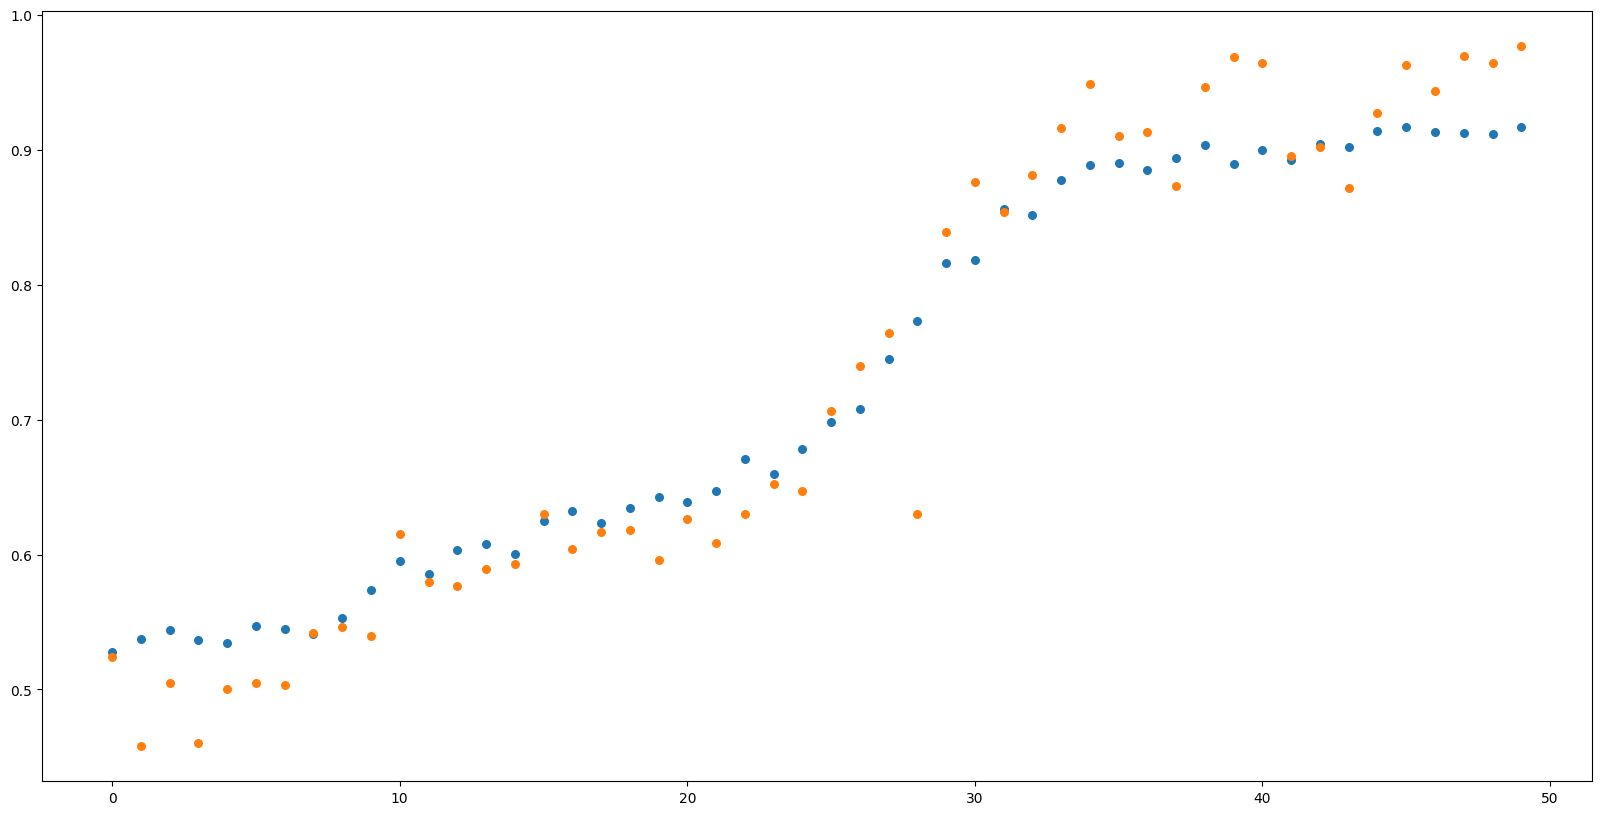

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

number_of_epochs = 50
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=2, validation_split=0.2)

plt.figure(figsize=(20, 10))
plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=30)
plt.scatter(range(number_of_epochs), model.history.history['val_accuracy'], s=30)
predictions = model.predict(X_test)
print("Accuracy: ", model.evaluate(X_test, y_test)[1])
print(predictions[:5])
print(y_test[:5])

model.save('model.keras')

In [38]:
#import model.keras and test it
model = keras.models.load_model('model.keras')
model.evaluate(X_test, y_test)
print("Accuracy", model.evaluate(X_test, y_test)[1] * 100)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9707 - loss: 0.0893
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9707 - loss: 0.0893
Accuracy 96.68874144554138


In [48]:
#Print the importance of each feature
importance = model.get_weights()[0]
importance = pd.DataFrame(importance)
importance = importance.T
importance = importance.abs()
importance = importance.sum(axis=1)
importance = importance / importance.sum()
importance.sort_values(ascending=False)

92     0.019878
53     0.019053
81     0.018459
127    0.017878
80     0.017238
         ...   
75     0.004445
54     0.004430
32     0.004395
104    0.004201
115    0.004156
Length: 128, dtype: float32

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
#What is n_estimators?
#n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the best number of trees for the specific use case.

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#What is RandomForestClassifier?
#Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Accuracy: 0.6699779249448123

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       444
           1       0.67      0.69      0.68       462

    accuracy                           0.67       906
   macro avg       0.67      0.67      0.67       906
weighted avg       0.67      0.67      0.67       906

